<a href="https://colab.research.google.com/github/mohamedalifaragitiai/HousePricingPrediction/blob/main/house_price_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Housing Prices Advanced Regression : EDA and Regression Models**

In this notebook I have performed thorough EDA on the housing dataset and tried to identify some keen underlying trends. Dtaa pre-processing is done after which different models have been applied. This kernel is an introduction to predictive modelling and demonstrates the various techniques. And it is must see if you are a beginner in regression and predictive modelling like me ;)

Let's dive in !!!.

## CONTENTS::

[ **1 ) Importing the Modules and Loading the Dataset**](#content1)

[ **2 ) Exploratory Data Analysis (EDA)**](#content2)

[ **3 ) Missing Values Treatment**](#content3)

[ **4 ) Handling Skewness of Features**](#content4)

[ **5 ) Prepare the Data**](#content5)

[ **6 ) Regression Models**](#content6)

[ **7 ) Saving and Making Submission to Kaggle**](#content7)

<a id="content1"></a>
## 1) Importing the Modules and Loading the Dataset

In [120]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.legend_handler import HandlerBase
import seaborn as sns
import missingno as msno
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

from scipy import stats
from scipy.stats import norm, skew   # specifically for staistics

In [121]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
cd /content/drive/MyDrive/Colab Notebooks/datasets/house pricing

/content/drive/MyDrive/Colab Notebooks/datasets/house pricing


In [123]:
train=pd.read_csv('train.csv')


In [124]:
test = pd.read_csv('test.csv')

In [125]:
train.head(10)
#

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [126]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


<a id="content2"></a>
## 2) Exploratory Data Analysis (EDA)

## 2.1 ) The Features and the 'Target' variable

In [127]:
df=train.copy()
#df.head(10)
df.shape

(1460, 81)

In [128]:
df.drop(['Id'],axis=1,inplace=True)
test.drop(['Id'],axis=1,inplace=True)

We can drop the 'Id' column as the frames are already indexed.

In [129]:
df.index # the indices of the rows.

RangeIndex(start=0, stop=1460, step=1)

In [130]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## 2.2 ) Check for Missing Values

In [131]:
df.isnull().any()

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 80, dtype: bool

<Axes: >

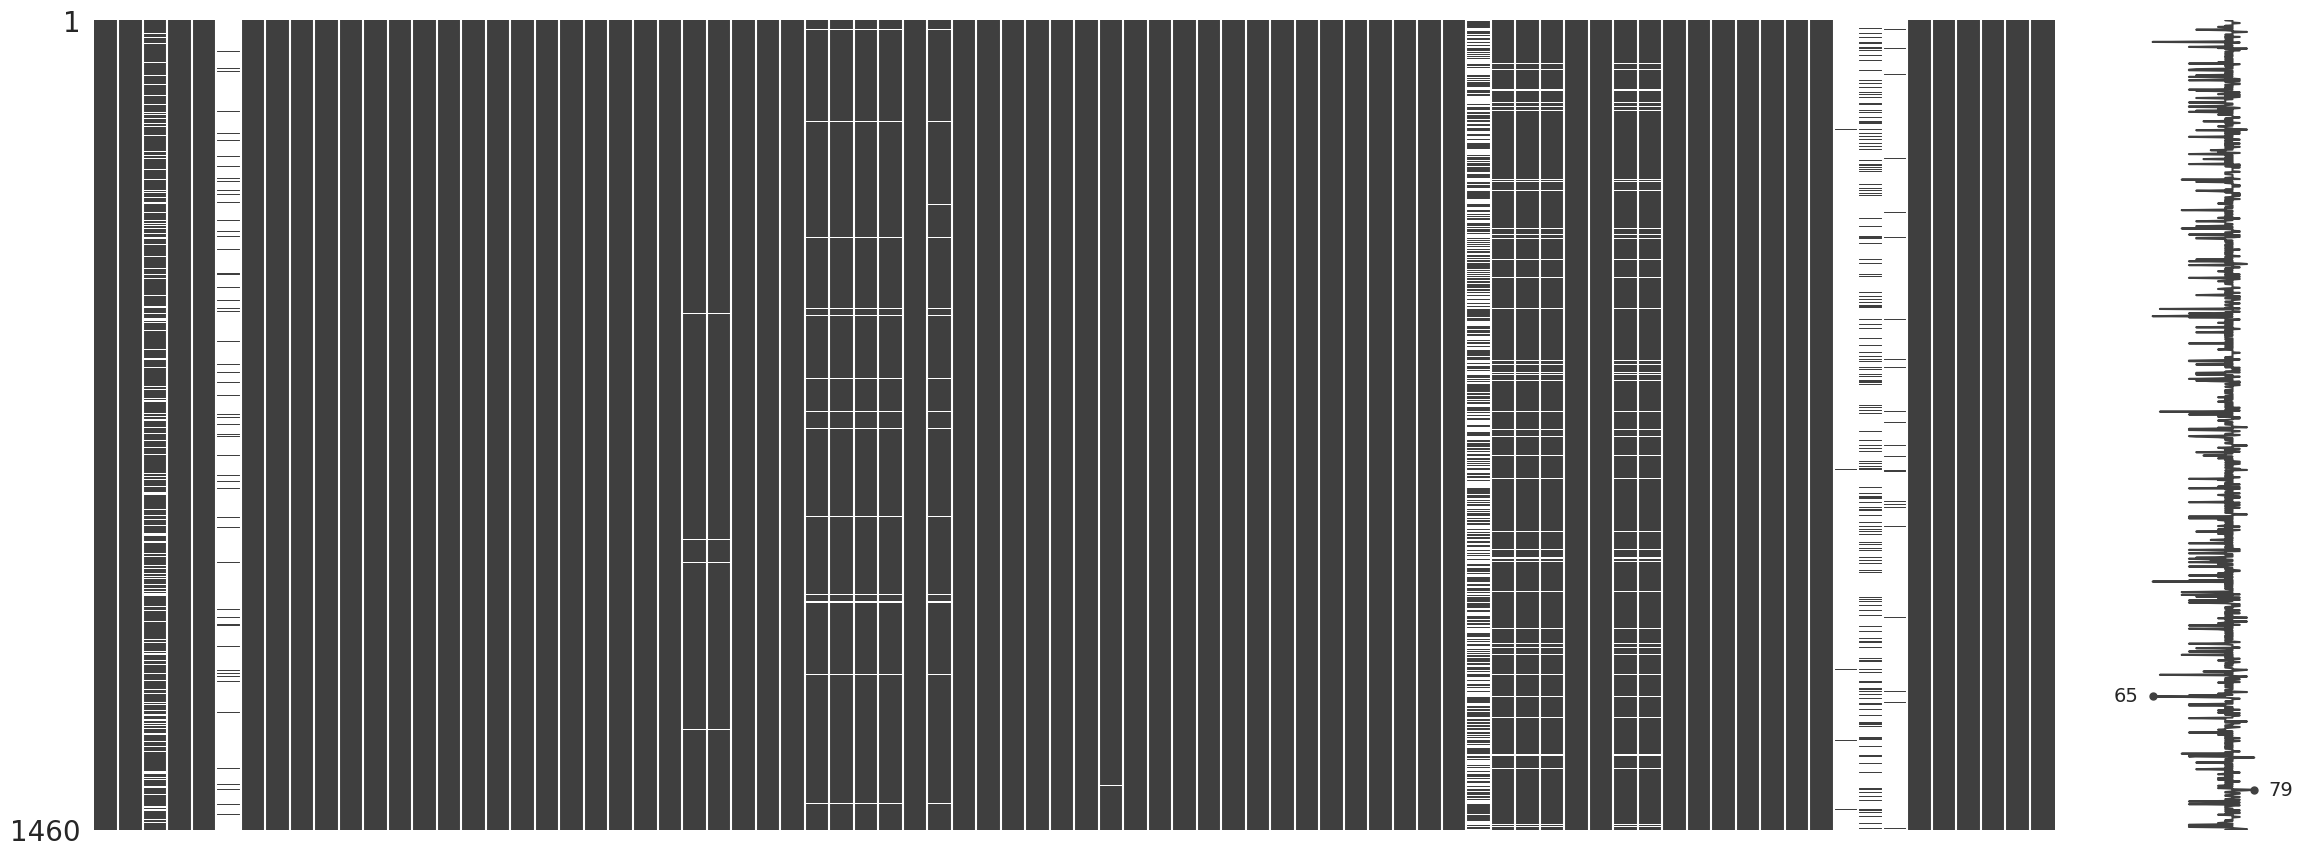

In [132]:
msno.matrix(df) # just to visulaize.

* #### Many columns have missing values and that will be treated later in the notebook.

## 2.3 ) Separate Dataframes (depending on data type)

Might be useful when we consider features of different data types.

#### CATEGORICAL FEATURES

In [133]:
cat_df=df.select_dtypes(include='object')

In [134]:
cat_df.head(10)
cat_df.shape

(1460, 43)

In [135]:
cat_df.columns   # list of the categorical columns.

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### NUMERIC FEATURES

In [136]:
num_df=df.select_dtypes(include='number')
num_df.shape

(1460, 37)

In [137]:
num_df.columns # list of numeric columns.

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

#### FEATURES WITH MISSING VALUES

In [138]:
nan_df=df.loc[:, df.isna().any()]
nan_df.shape
nan_df.columns   # list of columns with missing values.

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

#### MERGING THE TRAIN & TEST SETS

In [139]:
all_data=pd.concat([train,test])

In [140]:
print(all_data.shape)
all_data = all_data.reset_index(drop=True)

(2919, 81)


In [141]:
all_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2.0,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3.0,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4.0,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5.0,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6.0,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7.0,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8.0,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9.0,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10.0,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0


In [142]:
print(all_data.loc[1461:,'SalePrice'])
# note that it is Nan for the values in test set as expected. so we drop it here for now.
all_data.drop(['SalePrice'],axis=1,inplace=True)


1461   NaN
1462   NaN
1463   NaN
1464   NaN
1465   NaN
        ..
2914   NaN
2915   NaN
2916   NaN
2917   NaN
2918   NaN
Name: SalePrice, Length: 1458, dtype: float64


## 2.4 ) Analyzing the Target i.e. 'SalePrice'

Text(0.5, 1.0, 'Sale Price')

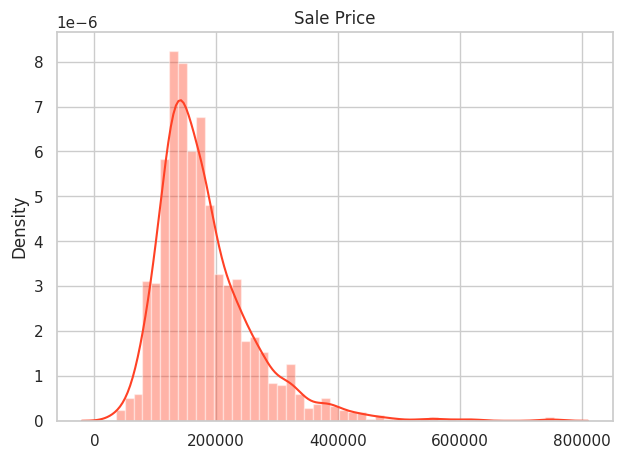

In [143]:
# analyzing the target variable ie 'Saleprice'
sns.distplot(a=df['SalePrice'],color='#ff4125',axlabel=False).set_title('Sale Price')

#### **The distribution of target is a bit right skewed. Hence taking the 'log transform' is a reasonable option.**

#### ALSO LINEAR REGRESSION IS BASED ON THE ASSUMPTION OF THE 'HOMOSCADESITY' AND HENCE TAKING LOG WILL  BE A GOOD IDEA TO ENSURE 'HOMOSCADESITY' (that the varince of errors is constant.). A bit scary but simple ;)

**You can read more about this on wikipedia.**

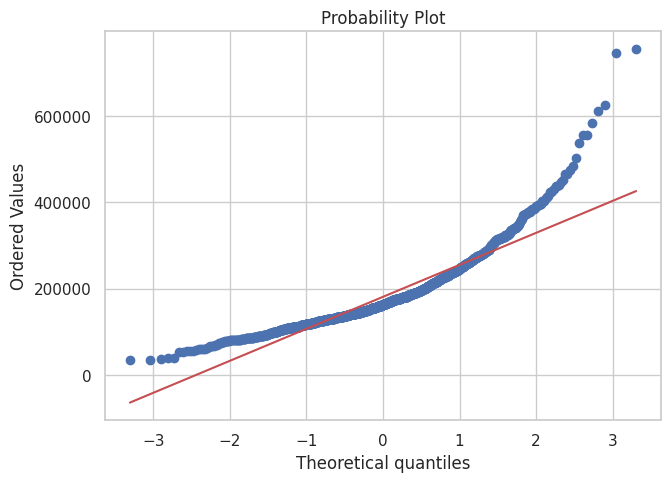

In [144]:
#Get also the qq-plot (the quantile-quantile plot)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

####  TAKING 'Log Transform' OF THE TARGET

In [145]:
df['SalePrice']=np.log1p(df['SalePrice'])

Text(0.5, 1.0, 'log(1+SalePrice)')

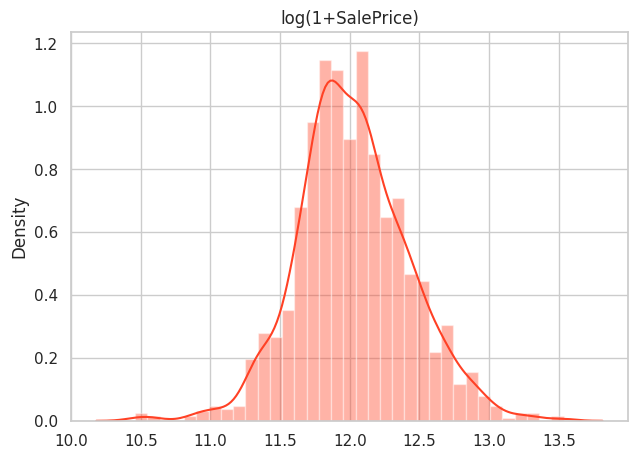

In [146]:
# now again see the distribution.
sns.distplot(a=df['SalePrice'],color='#ff4125',axlabel=False).set_title('log(1+SalePrice)')  # better.


## 2.5 ) Most Related Features to the Target

In [147]:
cor_mat= df[:].corr()
cor_with_tar=cor_mat.sort_values(['SalePrice'],ascending=False)

In [148]:
print("The most relevant features (numeric) for the target are :")
cor_with_tar.SalePrice

The most relevant features (numeric) for the target are :


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

#### INFERENCES--

1. Note that some of the features have quite high corelation with the target. These features are really significant.

2. Of these the features with corelation value >0.5 are really important. Some features like GrLivArea etc.. are even more important.

3. We will consider these features (i.e. GrLivArea,OverallQual) etc.. in more detail in subsequent sections during univariate and bivariate analysis.

<Axes: >

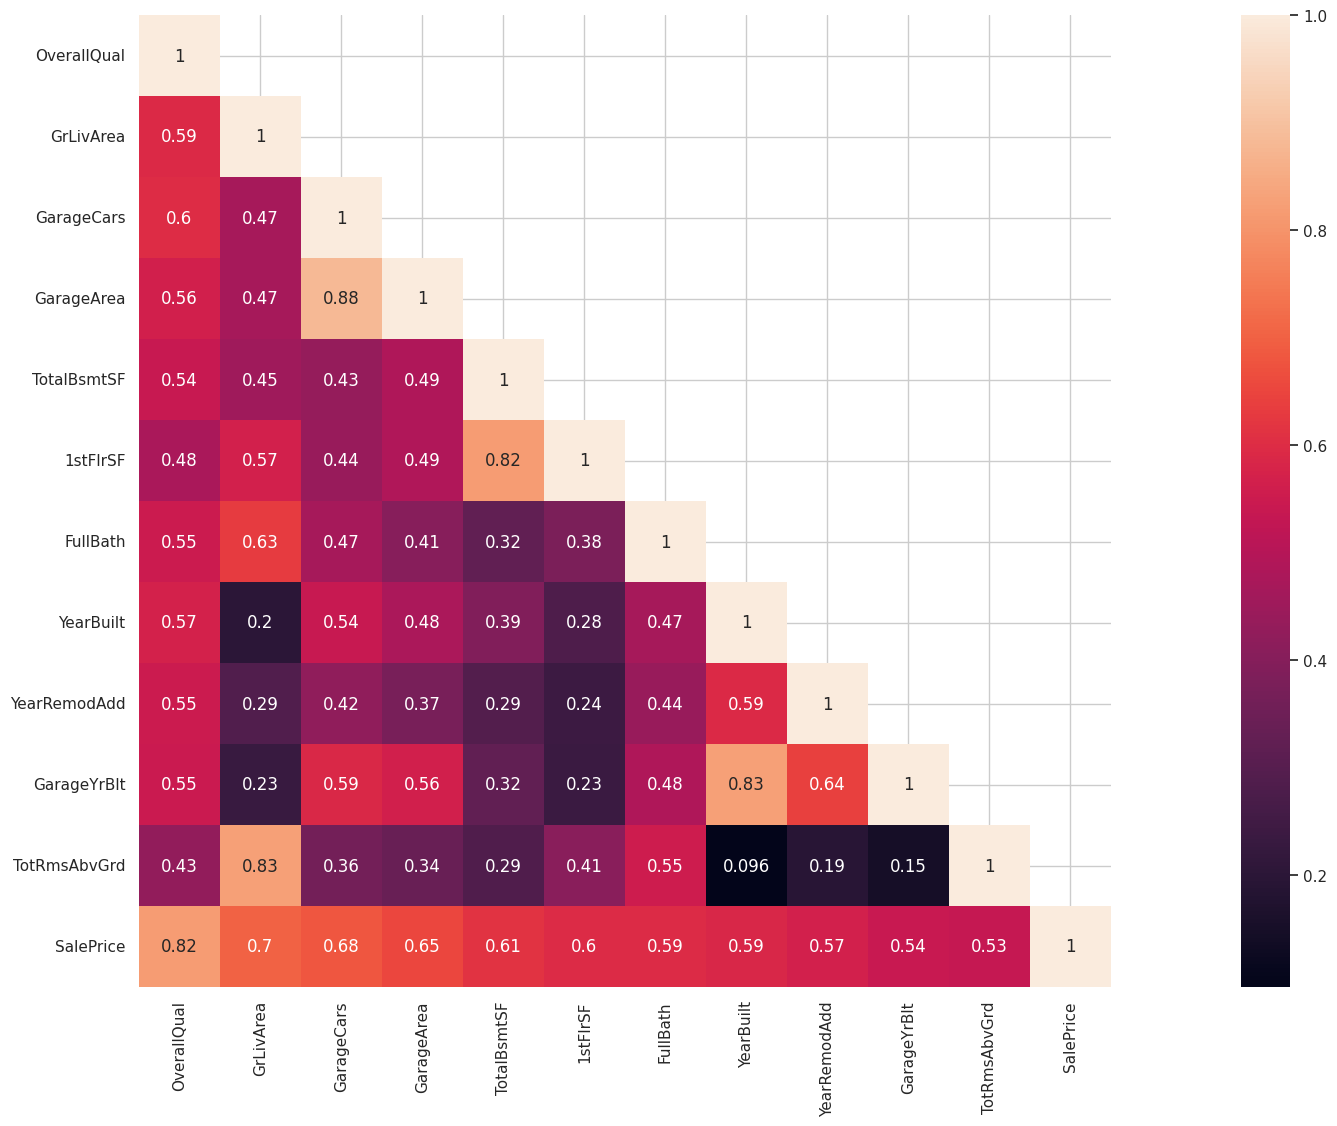

In [149]:
# using a corelation map to visualize features with high corelation.
cor_mat= df[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath',
             'YearBuilt','YearRemodAdd','GarageYrBlt','TotRmsAbvGrd','SalePrice']].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

# some inference section.

## 2.6 ) Univariate Analysis

In this section the univariate analysis is performed; More importantly I have considered the features that are more importanht with the 'Target' that  have high corelation with the Target.

For the numeric features I have used a 'distplot' and 'boxplot' to analyze their distribution.

Similarly for categorical features the most reasonable way to visualize the distribution is to use a 'countplot' which shows the relative counts for each category or class. Can use a pie-plot also to be a bit more fancy.

#### NUMERIC FEATURES

In [150]:
def plot_num(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=df,x=feature,ax=axes[0])
    sns.distplot(a=df[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)

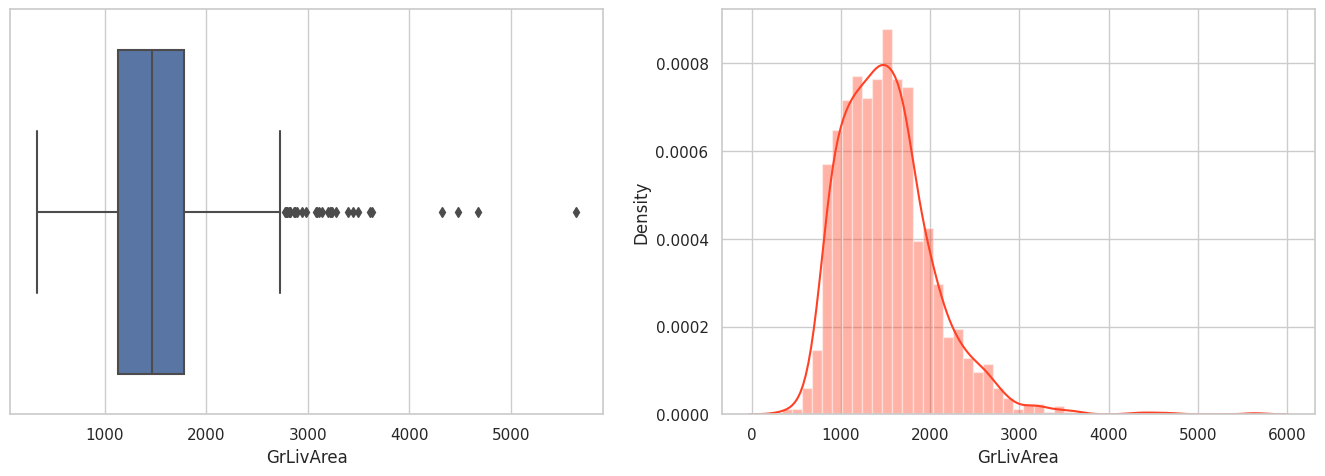

In [151]:
plot_num('GrLivArea')

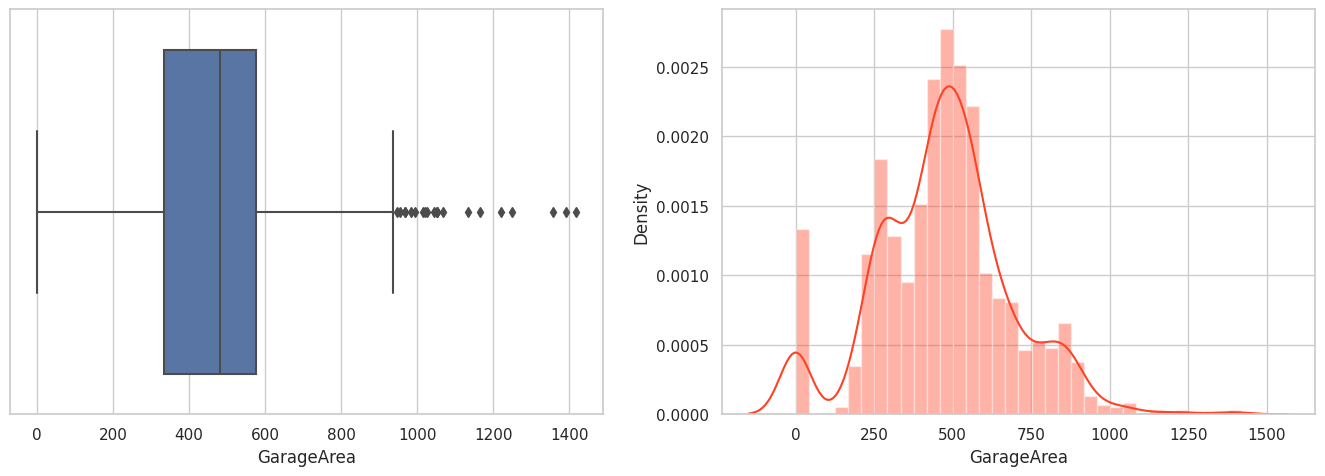

In [152]:
plot_num('GarageArea')

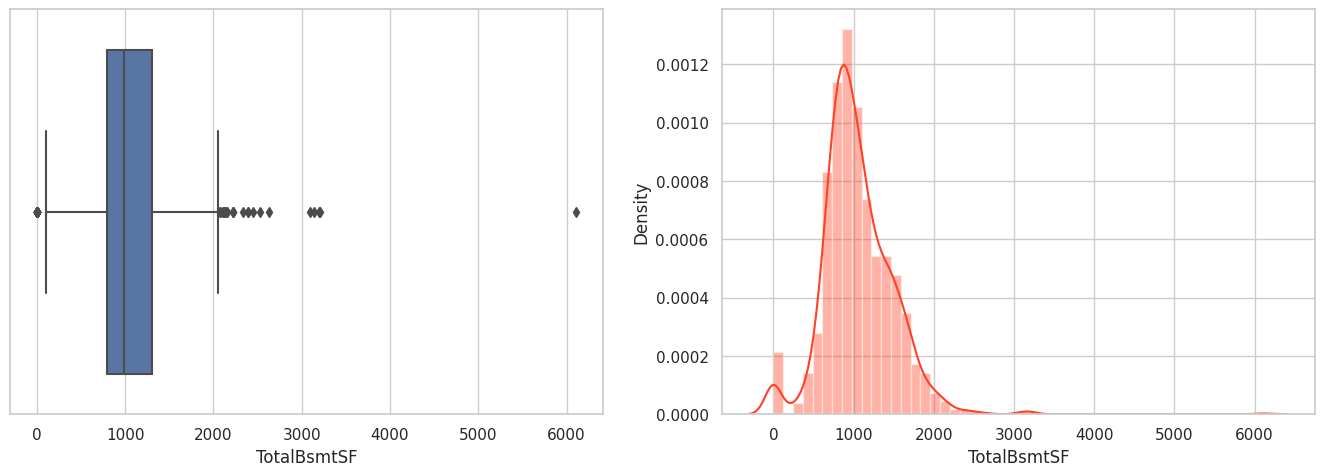

In [153]:
plot_num('TotalBsmtSF')

#### Note the features are a bit right skewed. We can therefore take 'log transform' of the features or a BoXCox transformation. Both shall work well.

#### CATEGORICAL FEATURES

In [154]:
def plot_cat(feature):
  sns.countplot(data=df,x=feature)
  ax=sns.countplot(data=df,x=feature)


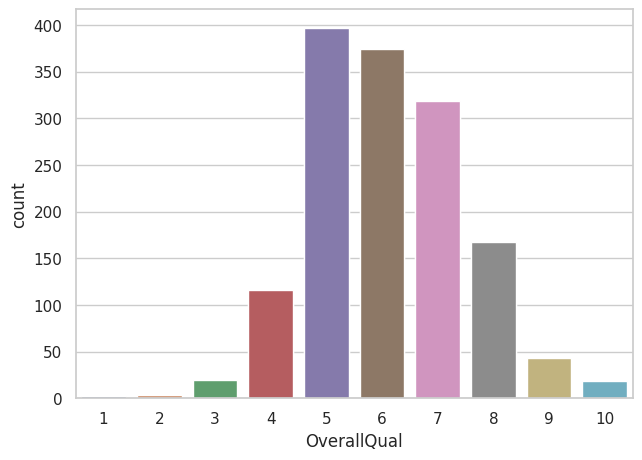

In [155]:
plot_cat('OverallQual')

Most of them are in 'average','above average' or 'good' classes.

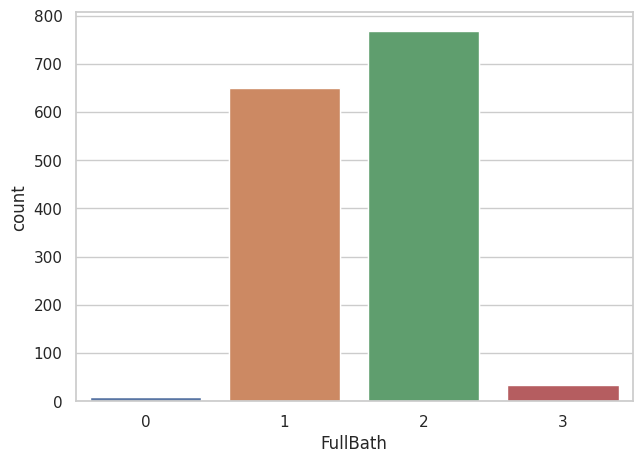

In [156]:
plot_cat('FullBath')

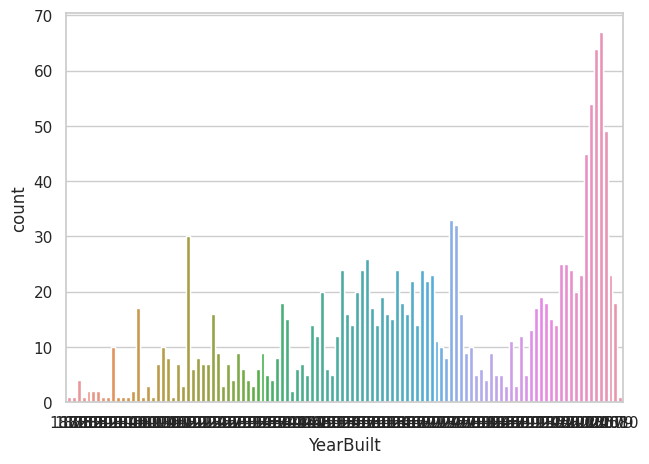

In [157]:
plot_cat('YearBuilt')

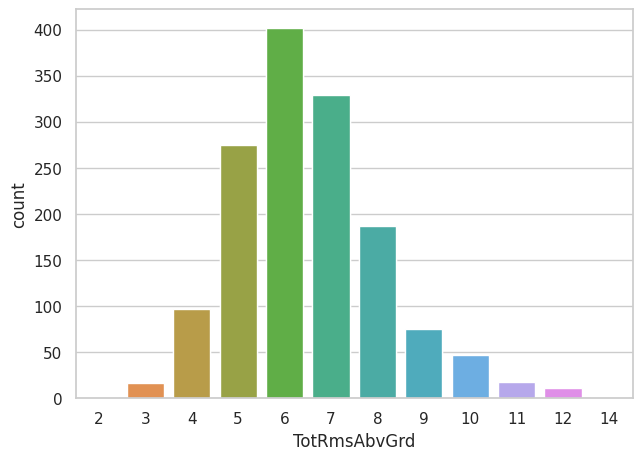

In [158]:
plot_cat('TotRmsAbvGrd') # most of the houses have 5-7 rooms above the grd floor.

#### Lastly we plot the countplot for some important features that are numerical here but are actually categorica. It seems if they have been label encoded.

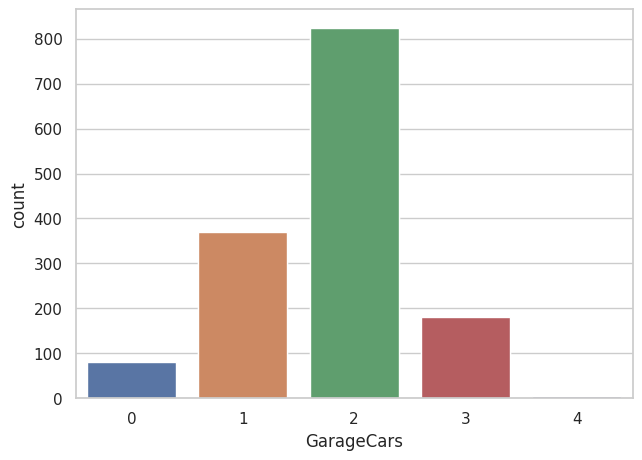

In [159]:
plot_cat('GarageCars')

<Axes: xlabel='Neighborhood', ylabel='count'>

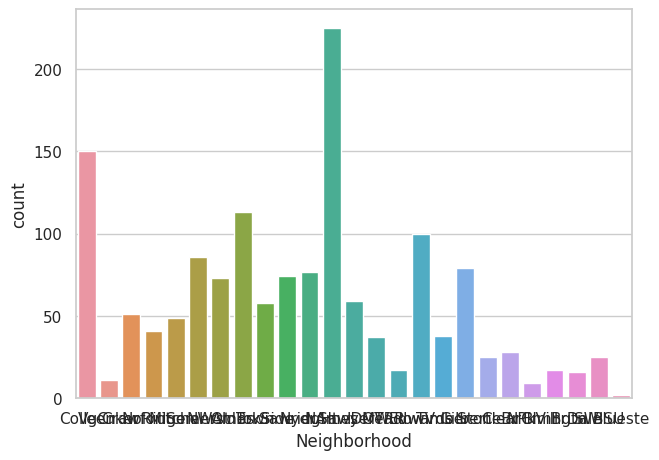

In [160]:
sns.countplot(data=df,x='Neighborhood')

## 2.7 ) Bivariate Analysis

In this section the Bivariate Analysis have been done. I have plotted various numeric as well as categorical features against the target ie 'SalePrice'.

#### NUMERIC FEATURES

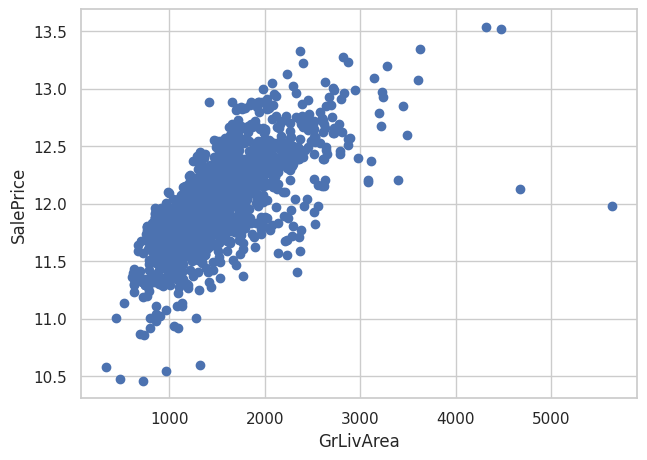

In [161]:
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

#### Note that there are two outliers on the lower right hand side and can remove them.

In [162]:
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<13)].index) # removing some outliers on lower right side.

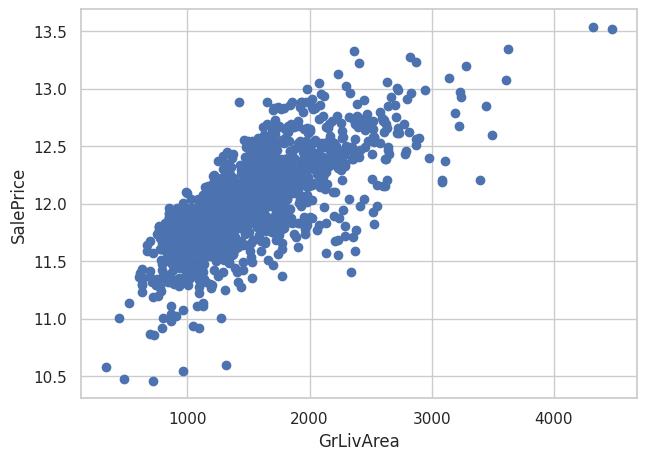

In [163]:
# again checking
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

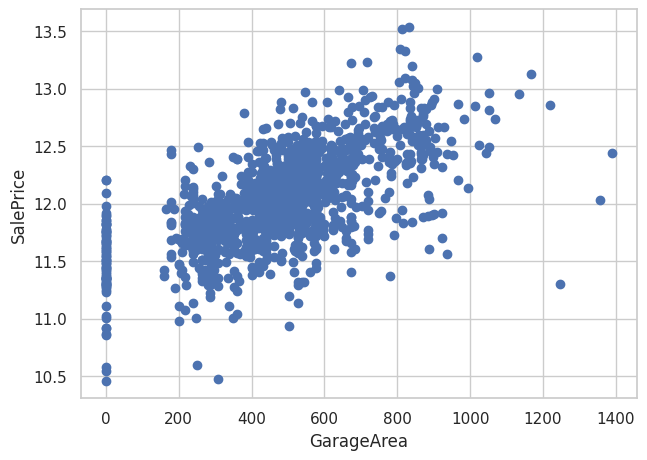

In [164]:
# garage area
fig, ax = plt.subplots()
ax.scatter(x =(df['GarageArea']), y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')
plt.show()
# can try to fremove the points with gargae rea > than 1200.

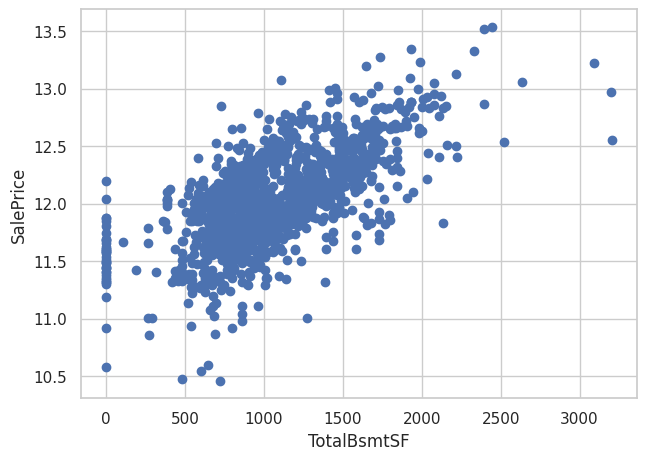

In [165]:
# basment area
fig, ax = plt.subplots()
ax.scatter(x =(df['TotalBsmtSF']), y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('TotalBsmtSF')
plt.show()   # check >3000 can leave here.

#### CATEGORICAL FEATURES

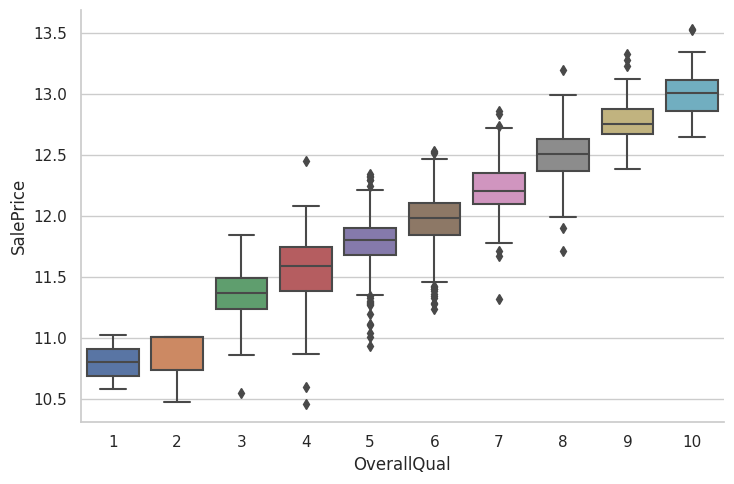

In [166]:
#overall qual
sns.catplot(data=df,x='OverallQual',y='SalePrice',kind='box',aspect=1.5)

The SalePrice increases with the overall quality as expected.

**Similar inferences can be drawn from other plots and graphs.**

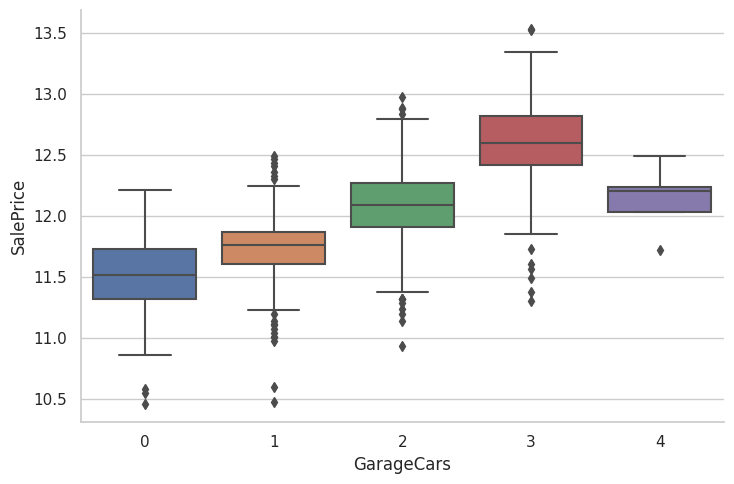

In [167]:
#garage cars
sns.catplot(data=df,x='GarageCars',y='SalePrice',kind='box',aspect=1.5)

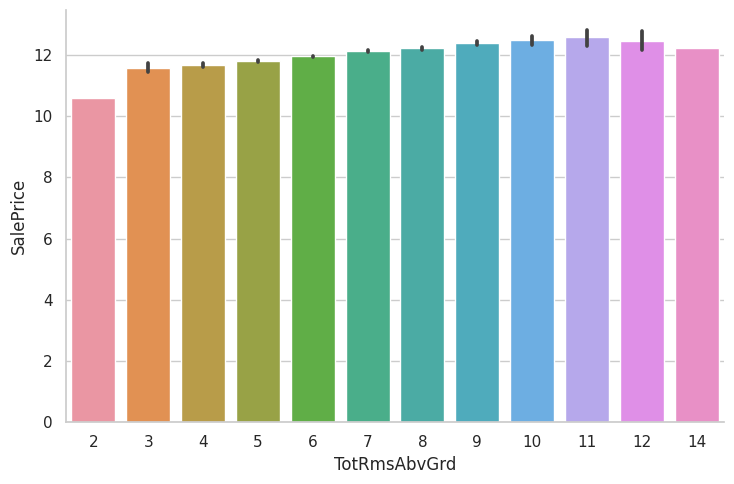

In [168]:
#no of rooms
sns.catplot(data=df,x='TotRmsAbvGrd',y='SalePrice',kind='bar',aspect=1.5) # increasing rooms imply increasing SalePrice as expected.

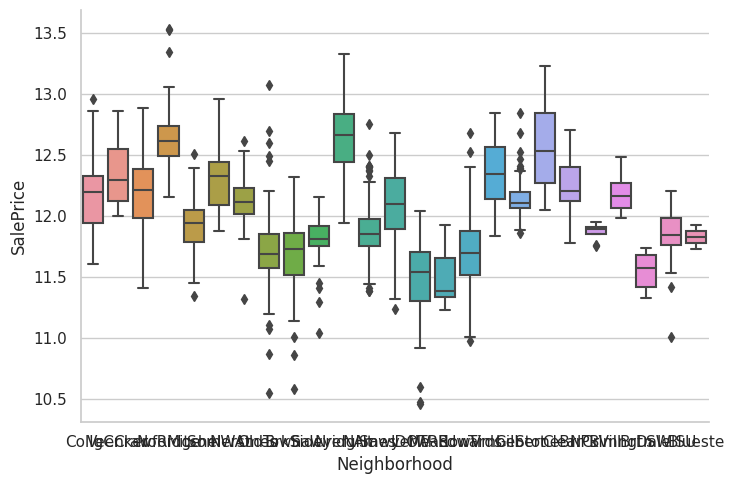

In [169]:
#neighborhood
sns.catplot(data=df,x='Neighborhood',y='SalePrice',kind='box',aspect=1.5)

Price varies with neighborhood.More posh areas of the city will have more price as expected.

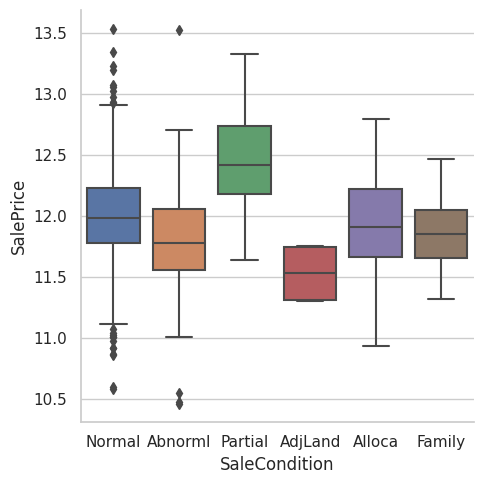

In [170]:
#sale conditioin
sns.catplot(data=df,x='SaleCondition',y='SalePrice',kind='box')

<a id="content3"></a>
## 3 ) Missing Values Treatment

In this section of the notebook I  have handled the missing values in the columns.

Firstly I have droped a couple of columns that have a really high % of missing values.

For other features I have analyzed if it that feaure is important or not and accordingly either have drooped it or imputed the values in it.

For imputation I have considered the meaning of the corressponding feature from the description. Like for a categorical feature if values are missing I have imputed "None" just to mark a separate category meaning absence of that thing. Similarly for a numeric feature I have imputed with 0 in case the missing value implies the 'absence' of that feature.

In all other cases I have imputed the categorical features with 'mode' i.e the most frequent class and with 'mean' for the numeric features.

In [171]:
nan_all_data = (all_data.isnull().sum())
nan_all_data= nan_all_data.drop(nan_all_data[nan_all_data== 0].index).sort_values(ascending=False)
nan_all_data
miss_df = pd.DataFrame({'Missing Ratio' :nan_all_data})
miss_df


,Missing Ratio
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
Id,1459
FireplaceQu,1420
LotFrontage,486
GarageCond,159
GarageFinish,159
GarageQual,159


In [172]:
#delet some features withvery high number of missing values.
all_data.drop(['PoolQC','Alley','Fence','Id','MiscFeature'],axis=1,inplace=True)


In [173]:
test.drop(['PoolQC','Alley','Fence','MiscFeature'],axis=1,inplace=True)
df.drop(['PoolQC','Alley','Fence','MiscFeature'],axis=1,inplace=True)

In [174]:
# FireplaceQu
# it is useful but many of the values nearly half are missing makes no sense to fill half of the values. so deleting this
all_data.drop(['FireplaceQu'],axis=1,inplace=True)
test.drop(['FireplaceQu'],axis=1,inplace=True)
df.drop(['FireplaceQu'],axis=1,inplace=True)


float64
count    1199.000000
mean       69.797331
std        23.203458
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
The corelation of the LotFrontage with the Target :  0.3728996552244499


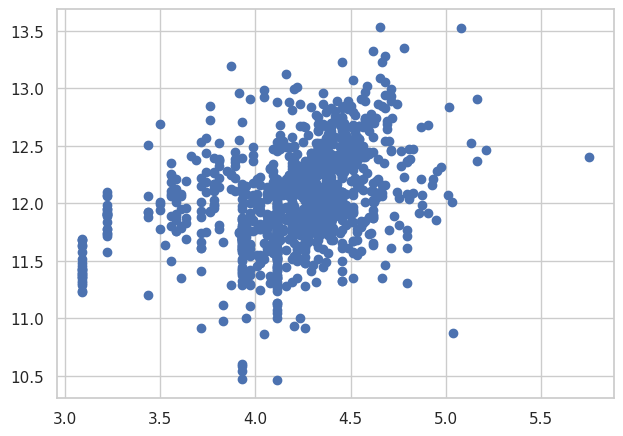

In [175]:
#Lot Frontage
print(df['LotFrontage'].dtype)
plt.scatter(x=np.log1p(df['LotFrontage']),y=df['SalePrice'])
cr=df.corr()
print(df['LotFrontage'].describe())
print("The corelation of the LotFrontage with the Target : " , cr.loc['LotFrontage','SalePrice'])


#### Above analysis shows that there is some relation of LotArea with the SalePrice both by scatter plot and also by the corelation value. Therefore instead of deleting I will impute the values with the mean for now.

In [176]:
all_data['LotFrontage'].fillna(np.mean(all_data['LotFrontage']),inplace=True)
all_data['LotFrontage'].isna().sum()

0

In [177]:
#Garage  related features.
# these features eg like garage qual,cond,finish,type seems to be important and relevant for buying car.
# hence I will not drop these features insted i will fill them with the 'none' for categorical and 0 for numeric as nan here implies that there is no garage.

all_data['GarageYrBlt'].fillna(0,inplace=True)
print(all_data['GarageYrBlt'].isnull().sum())

all_data['GarageArea'].fillna(0,inplace=True)
print(all_data['GarageArea'].isnull().sum())

all_data['GarageCars'].fillna(0,inplace=True)
print(all_data['GarageCars'].isnull().sum())

all_data['GarageQual'].fillna('None',inplace=True)   # creating a separate category 'none' which means no garage.
print(all_data['GarageQual'].isnull().sum())

all_data['GarageFinish'].fillna('None',inplace=True)   # creating a separate category 'none' which means no garage.
print(all_data['GarageFinish'].isnull().sum())

all_data['GarageCond'].fillna('None',inplace=True)   # creating a separate category 'none' which means no garage.
print(all_data['GarageCond'].isnull().sum())

all_data['GarageType'].fillna('None',inplace=True)   # creating a separate category 'none' which means no garage.
print(all_data['GarageType'].isnull().sum())



0
0
0
0
0
0
0


In [178]:
# basement related features.
#missing values are likely zero for having no basement

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col].fillna(0,inplace=True)

# for categorical features we will create a separate class 'none' as before.

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col].fillna('None',inplace=True)

print(all_data['TotalBsmtSF'].isnull().sum())



0


In [179]:
# MasVnrArea 0 and MasVnrType 'None'.
all_data['MasVnrArea'].fillna(0,inplace=True)
print(all_data['MasVnrArea'].isnull().sum())

all_data['MasVnrType'].fillna('None',inplace=True)
print(all_data['MasVnrType'].isnull().sum())

0
0


In [180]:
#MSZoning.
# Here nan does not mean no so I will with the most common one ie the mode.
all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0],inplace=True)
print(all_data['MSZoning'].isnull().sum())

0


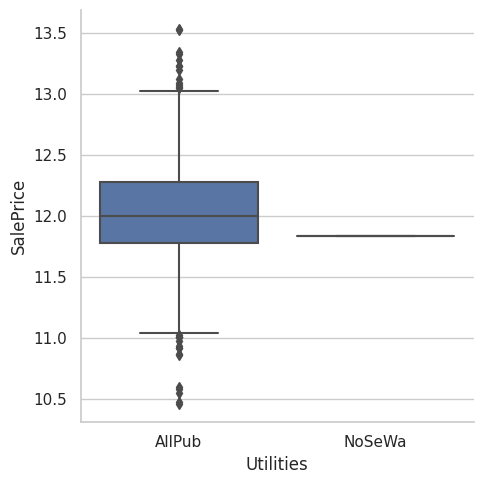

In [181]:
# utilities
sns.catplot(data=df,kind='box',x='Utilities',y='SalePrice')

#### Note that training set has only 2 of the possible 4 categories (ALLPub and NoSeWa) while test set has other categories. Hence it is of no use to us.

In [182]:
all_data.drop(['Utilities'],axis=1,inplace=True)

In [183]:
#functional
# fill with mode
all_data['Functional'].fillna(all_data['Functional'].mode()[0],inplace=True)
print(all_data['Functional'].isnull().sum())

0


In [184]:
# other rem columns rae all cat like kitchen qual etc.. and so filled with mode.
for col in ['SaleType','KitchenQual','Exterior2nd','Exterior1st','Electrical']:
  all_data[col].fillna(all_data[col].mode()[0],inplace=True)
  print(all_data[col].isnull().sum())

0
0
0
0
0


#### Lastly checking if any null value still remains.

In [185]:
nan_all_data = (all_data.isnull().sum())
nan_all_data= nan_all_data.drop(nan_all_data[nan_all_data== 0].index).sort_values(ascending=False)
nan_all_data
miss_df = pd.DataFrame({'Missing Ratio' :nan_all_data})
miss_df



,Missing Ratio


#### Finally no null value remain now;)

In [186]:
all_data.shape

(2919, 73)

<a id="content4"></a>
## 4 ) Handling Skewness

For handling skewnesss I will take the log transform of the features with skewness > 0.5.

You can also try the BoxCox transformation as mentioned before.

In [187]:
#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.50]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

<a id="content5"></a>
## 5 ) Prepare the Data

## 5.1 ) LabelEncode the Categorical Features

In [188]:
for col in all_data.columns:
    if(all_data[col].dtype == 'object'):
        le=LabelEncoder()
        all_data[col]=le.fit_transform(all_data[col])

## 5.2 ) Splitting into Training and Validation Sets

In [189]:
train=all_data.loc[:(df.shape)[0]+2,:]
test=all_data.loc[(df.shape)[0]+2:,:]

In [190]:
train['SalePrice']=df['SalePrice']
train['SalePrice'].fillna(np.mean(train['SalePrice']),inplace=True)
train.shape
print(train['SalePrice'].isnull().sum())

0


In [191]:
print(train.shape)
print(test.shape)

(1461, 74)
(1459, 73)


In [192]:
x_train,x_test,y_train,y_test=train_test_split(train.drop(['SalePrice'],axis=1),train['SalePrice'],test_size=0.20,random_state=42)

<a id="content6"></a>
## 6 ) Regression Models

Lastly it is the time to apply various regression models and check how are we doing. I have used various regression models from the scikit.

Parameter tuning using GridSearchCV is also done to improve performance of some algos.

#### The evalauton metric that I have used is the Root Mean Squared Error between the 'Log of the actual price' and 'Log of the predicted value' which is also the evaluation metric used by the kaggle.

#### To get abetter idea one may also use the K-fold cross validation insteadof the normal holdout set approach to cross validation.

#### LINEAR REGRESSION

In [193]:
reg_lin=LinearRegression()
reg_lin.fit(x_train,y_train)
pred=reg_lin.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.1428028906407541


#### LASSO (and tuning with GridSearchCV)

In [194]:
reg_lasso=Lasso()
reg_lasso.fit(x_train,y_train)
pred=reg_lasso.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.2957532540264061


In [195]:
params_dict={'alpha':[0.001, 0.005, 0.01,0.05,0.1,0.5,1]}
reg_lasso_CV=GridSearchCV(estimator=Lasso(),param_grid=params_dict,scoring='neg_mean_squared_error',cv=10)
reg_lasso_CV.fit(x_train,y_train)
pred=reg_lasso_CV.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.14218169068248585


**Note the significant decrease in the RMSE on tuning the Lasso Regression.**

In [196]:
reg_lasso_CV.best_params_

{'alpha': 0.001}

#### RIDGE (and tuning with GridSearchCV)

In [197]:
reg_ridge=Ridge()
reg_ridge.fit(x_train,y_train)
pred=reg_ridge.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.14253914858494476


In [198]:
params_dict={'alpha':[0.1, 0.15, 0.20,0.25,0.30,0.35,0.4,0.45,0.50,0.55,0.60]}
reg_ridge_CV=GridSearchCV(estimator=Ridge(),param_grid=params_dict,scoring='neg_mean_squared_error',cv=10)
reg_ridge_CV.fit(x_train,y_train)
pred=reg_ridge_CV.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.14260301966704012


In [199]:
reg_ridge_CV.best_params_

{'alpha': 0.45}

#### GRADIENT BOOSTING

In [200]:
#the params are tuned with grid searchCV.

reg_gb=GradientBoostingRegressor(n_estimators=2000,learning_rate=0.05,max_depth=3,min_samples_split=10,max_features='sqrt',subsample=0.75 ,loss='huber')
reg_gb.fit(x_train,y_train)
pred=reg_gb.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

0.12160404245798824


#### XGBoost

In [201]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb.fit(x_train,y_train)
pred=model_xgb.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

[11:03:10] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

0.13081355473480794


Note that the parameters aren't optimized. This can get a lot better tahn this for sure.

<a id="content7"></a>
## 7 ) Saving and Making Submission to Kaggle

**The Gradient Boosting gives the best performance on the validation set and so I am using it to make predictions to Kaggle (on the test set).**

In [202]:
# predictions on the test set.

pred=reg_gb.predict(test)
pred_act=np.exp(pred)
pred_act=pred_act-1
len(pred_act)

1459

In [203]:
test_id=[]
for i in range (1461,2920):
    test_id.append(i)
d={'Id':test_id,'SalePrice':pred_act}
ans_df=pd.DataFrame(d)
ans_df.head(10)

,Id,SalePrice
0,1461,150290.118342
1,1462,165786.613716
2,1463,191043.927813
3,1464,186145.876036
4,1465,195498.738593
5,1466,174466.344632
6,1467,180356.598244
7,1468,164994.831664
8,1469,172251.945465
9,1470,124670.740896
